In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [4]:
rawdataAll = pd.read_excel('data/hour30days.xlsx')
#rawdataAll.head()
preProcDataAll = rawdataAll.dropna(axis='rows', how='any') 
print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll.shape))

before:(742, 25)
after:(489, 25)


In [5]:
feature_names = preProcDataAll.columns
df = preProcDataAll[feature_names]
raw_feature = df[:-1]
raw_target = df['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]


In [6]:
print(raw_target.shape)
print(raw_feature.shape)


(488,)
(488, 25)


In [7]:
X_train, X_test,Y_train, Y_test = train_test_split(
    raw_feature, raw_target, test_size=0.25, random_state=5)

In [8]:
print("X_train:"+str(X_train.shape))
print("X_test:"+str(X_test.shape))
print("Y_train:"+str(Y_train.shape))
print("Y_test:"+str(Y_test.shape))

X_train:(366, 25)
X_test:(122, 25)
Y_train:(366,)
Y_test:(122,)


In [9]:
feature = X_train
target = Y_train
feature.head()

,中山區中山風速 WIND_SPEED (m/sec),中山區中山風向 WIND_DIREC (degrees),中山區中山溫度 AMB_TEMP (℃),中山區中山細懸浮微粒 PM 2.5 (μg/m 3 ),北投區陽明風速 WIND_SPEED (m/sec),北投區陽明風向 WIND_DIREC (degrees),北投區陽明溫度 AMB_TEMP (℃),北投區陽明細懸浮微粒 PM 2.5 (μg/m 3 ),北投區士林風速 WIND_SPEED (m/sec),北投區士林風向 WIND_DIREC (degrees),...,萬華區萬華細懸浮微粒 PM 2.5 (μg/m 3 ),松山區松山風速 WIND_SPEED (m/sec),松山區松山風向 WIND_DIREC (degrees),松山區松山溫度 AMB_TEMP (℃),松山區松山細懸浮微粒 PM 2.5 (μg/m 3 ),大安區古亭風速 WIND_SPEED (m/sec),大安區古亭風向 WIND_DIREC (degrees),大安區古亭溫度 AMB_TEMP (℃),大安區古亭細懸浮微粒 PM 2.5 (μg/m 3 ),大同區大同細懸浮微粒 PM 2.5 (μg/m 3 )
483,0.9,268.0,24.1,36.0,4.1,160.0,18.4,21.0,1.7,283.0,...,44.0,1.5,23.8,209.0,47.0,1.6,184.0,23.7,50.0,29.0
63,1.9,183.0,17.6,7.0,1.1,170.0,11.7,2.0,1.6,100.0,...,6.0,1.9,203.0,17.7,9.0,1.1,186.0,18.0,10.0,7.0
376,3.1,117.0,19.5,17.0,4.3,160.0,10.1,14.0,3.0,85.0,...,10.0,2.4,53.0,18.9,14.0,3.2,19.6,82.0,23.0,17.0
527,2.0,87.0,18.0,3.0,3.8,110.0,11.1,1.0,2.9,50.0,...,7.0,2.1,16.9,34.0,9.0,2.5,80.0,18.0,7.0,9.0
499,1.6,96.0,25.9,23.0,2.0,40.0,19.0,12.0,2.7,285.0,...,27.0,1.8,24.8,41.0,28.0,1.8,56.0,26.3,29.0,29.0


In [10]:
#target.head()
#feature.head()
lm = LinearRegression()
X = feature
Y = target
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print('coef is:',lm.coef_)
print('intercept is:',lm.intercept_)

coef is: [ 4.25140554e-01  6.31225525e-03 -8.18043724e-03  6.55338507e-02
 -5.72867224e-02  1.97381992e-03  1.10463450e-03  1.08967010e-01
 -1.76550015e-01  2.47959166e-03  9.71417987e-01  2.60340011e-02
  3.11941658e-03  4.73423591e-03 -8.86350297e-01  1.32702697e-01
 -1.50628282e-01  1.37799813e-03  1.76028637e-03  4.57837364e-01
 -6.16736051e-01  1.12803948e-03  3.35095375e-04  9.26397420e-02
  4.46372107e-02]
intercept is: -0.1702097961634692


In [12]:
pd.DataFrame( list(zip(X.columns, lm.coef_)) , columns = ['feature','estimatedCoefficients'])

,feature,estimatedCoefficients
0,中山區中山風速 WIND_SPEED (m/sec),0.425141
1,中山區中山風向 WIND_DIREC (degrees),0.006312
2,中山區中山溫度 AMB_TEMP (℃),-0.008180
3,中山區中山細懸浮微粒 PM 2.5 (μg/m 3 ),0.065534
4,北投區陽明風速 WIND_SPEED (m/sec),-0.057287
5,北投區陽明風向 WIND_DIREC (degrees),0.001974
6,北投區陽明溫度 AMB_TEMP (℃),0.001105
7,北投區陽明細懸浮微粒 PM 2.5 (μg/m 3 ),0.108967
8,北投區士林風速 WIND_SPEED (m/sec),-0.176550
9,北投區士林風向 WIND_DIREC (degrees),0.002480


In [13]:
lm.predict(X[:5])

array([43.05041339, 10.27048245, 14.40385148,  7.59445058, 26.6581778 ])

In [14]:
mse = np. mean( (Y_test - lm.predict(X_test))**2 )
print(mse) 

21.347243995289745


In [15]:
lm.predict(X_test[:5])

array([18.64993851, 20.3658001 , 11.54188109, 50.40425352, 15.56355111])

In [16]:
lm.score(X_test,Y_test)

0.8656450559392016

In [17]:
import requests
path='https://maker.ifttt.com/trigger/noticePM25/with/key/{your_key}'
body={
    'value1':' 松山區 ',
    'value2':' testing ',
    'value3':''
}
r = requests.post(path, data =body)
print(r.text)

Congratulations! You've fired the noticePM25 event


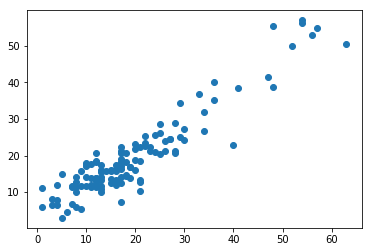

In [18]:
plt.scatter(Y_test, lm.predict(X_test))
plt.show()